# Silent Push API Highlights

This notebook is designed to introduce and allow you to test out a collection of Silent Push's most popular APIs to use in integrations. To get started, add your Silent Push API key in the cell below and then run it.

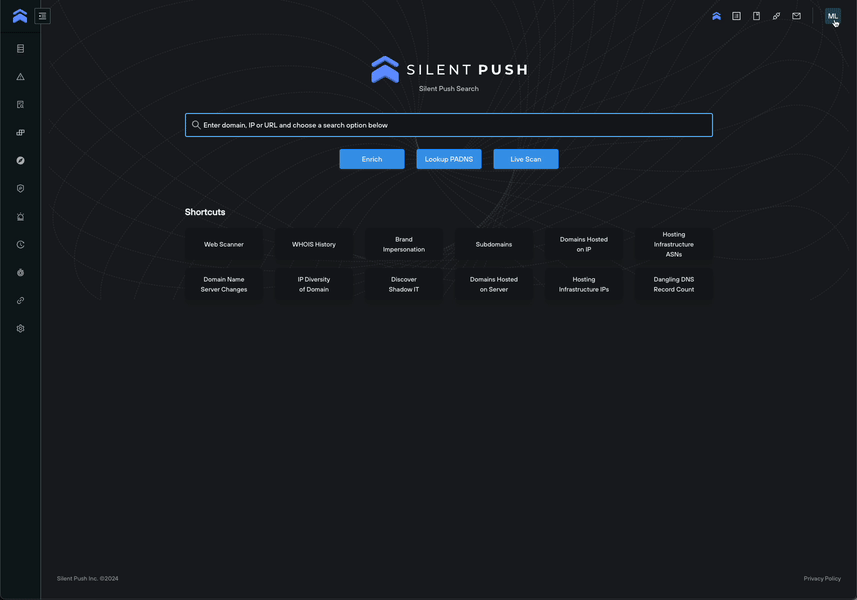

In [2]:
api_key = "" # Add API Key

# Search Scan Data

Search against Silent Push's database of scanning data using [Silent Push Query Language (SPQL)](https://help.silentpush.com/docs/spql).

Please see [here](https://help.silentpush.com/docs/api-functionality-1) for more documentation.

In [ ]:
import requests
import pandas as pd
import json

query = "tld=cool" # @param {type:"string"}
url = "https://api.silentpush.com/api/v1/merge-api/explore/scandata/search/raw?limit=100&with_metadata=1"

payload = json.dumps({
 "query": query,
})

headers = {
 'Content-Type': 'application/json',
 'x-api-key': api_key,
 'meta-data': '1'
}

response = requests.request("POST", url, headers=headers, data=payload)
results = json.loads(response.text)['response']['scandata_raw']
results = pd.DataFrame(results)
results

,HHV,adtech,body_analysis,datahash,datasource,domain,favicon2_md5,favicon_md5,file,file_sha256,...,redirect_to_https,resolves_to,response,scan_date,scheme,ssl,subdomain,tld,url,user-agent
0,ee9e1d8ddc0fdd6020f6b10903,"{'ads_txt': False, 'app_ads_txt': False, 'sell...","{'SHV': 'cb9c2f413ee2da1b0eddfb7ec1', 'adsense...",ddeb808494f38a487d319c80811a32783f268a4a8d30ff...,webscan,leaseplan.cool,,,False,,...,True,"[54.229.129.43, 54.72.89.209, 54.195.155.86]",200,2024-06-11 00:27:14,http,{'CHV': '7ef117b4ce58f14d4f1737b7abbb549269494...,www,cool,http://www.leaseplan.cool/select-country-language,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...


# Live Scan

In [ ]:
import requests
import json
import pandas as pd

url = "https://www.silentpush.com/" # @param {type:"string"}
os = "Windows" # @param ["Windows","Linux","MacOS","iOS","Android"]
region = "US" # @param ["US","EU","AS","TOR"]
platform = "Desktop" # @param ["Desktop","Mobile","Crawler"]
browser = "Chrome" # @param ["Firefox", "Chrome", "Edge", "Safari"]

api_url = f"https://api.silentpush.com/api/v1/merge-api/explore/tools/scanondemand?url={url}&platform={platform}&OS={os}&browser={browser}&region={region}"

data = requests.get(api_url, headers={'x-api-key': api_key})

json_data = json.loads(data.content)['response']
df = pd.DataFrame(json_data)
df

,scan
HHV,ef1c3b01903730bb3ea3502c1d
adtech,"{'ads_txt': False, 'app_ads_txt': False, 'sell..."
body_analysis,"{'SHV': '5b7c1a07bd743c382591d62a24', 'adsense..."
datahash,654263f43ab141a4a808fdb8516f33fe53c6825db851b5...
domain,silentpush.com
favicon2_avg,000000c0fc3f0fc3f0cc00000
favicon2_md5,0df01235ef5994f381784c8407affd84
favicon2_murmur3,-2032288512
favicon2_path,https://www.silentpush.com/wp-content/uploads/...
favicon_md5,


# Live Screenshot

In [ ]:
import requests
import json
import pandas as pd

url = "https://www.virustotal.com/gui/domain/tbibank-bg.com" # @param {type:"string"}

url = f"https://api.silentpush.com/api/v1/merge-api/explore/tools/screenshotondemand?url={url}"
data = requests.get(url, headers={'x-api-key': api_key})

json_data = json.loads(data.content)['response']
screenshot_url = pd.json_normalize(json_data)['screenshot.message'][0]
screenshot_url

'https://fs.silentpush.com/screenshots/virustotal.com/dc17ef2efd19c8d178ae2800000cfdc5.jpg'

# Get Indicator of Future Attack Feed

Silent Push allows you to automate the export of code snippets that facilitate a connection between your existing security stack, and Indicators of Future Attack obtained from Silent Push, through the use of an API key and a feed UUID.

Please see [here](https://help.silentpush.com/docs/automated-exports) for more documentation.

In [ ]:
import requests
import json
import pandas as pd

# Enter UUID of Feed (found in URL of feed in app)
feed_uuid = "6fe49452-32a6-4374-9191-79593e903164" # @param {type:"string"}

data = requests.get(f'https://app.silentpush.com/api/v2/iocs/threat-ranking/?page=1&limit=1000&distinct=false&source_uuids={feed_uuid}&order=-total_ioc,-total_source_score&state=Feed&advanced=advanced', headers={'x-api-key': api_key})
json_data = json.loads(data.content)
df = pd.DataFrame(json_data)
df

,name,uuid,type,ioc_template,last_seen_on,source_name,source_vendor_name,alexa_top10k_score,url_shortener_score,dynamic_domain_score,...,total_ioc,source_custom_score,source_geographic_spread_score,total_custom,source_last_updated_score,source_frequency_score,source_accuracy_score,total_source_score,total,collected_tags
0,ashopamznchecktre.fun,4f4b37bc78b88234,domain,domain,2024-06-10T23:22:33,Loader - Darkgate Domains,Silent Push,0,0,0,...,100,100,0,0,40,60,100,100,100,[]
1,lksklcmndrsm.com,cbd3a0ef47cfef69,domain,domain,2024-06-10T23:22:33,Loader - Darkgate Domains,Silent Push,0,0,0,...,100,100,0,0,40,60,100,100,100,[]
2,jamans439294u574.store,feaac7282642050b,domain,domain,2024-06-10T23:22:33,Loader - Darkgate Domains,Silent Push,0,0,0,...,100,100,0,0,40,60,100,100,100,[]
3,naserviceebaysmman.shop,0f073b5ed288a028,domain,domain,2024-06-10T23:22:33,Loader - Darkgate Domains,Silent Push,0,0,0,...,100,100,0,0,40,60,100,100,100,[]
4,onlysportsfitnessam.com,13406bf8d7d61470,domain,domain,2024-06-10T23:22:33,Loader - Darkgate Domains,Silent Push,0,0,0,...,100,100,0,0,40,60,100,100,100,[]
5,msteamseyeappstore.com,483be17084d17bb7,domain,domain,2024-06-10T23:22:33,Loader - Darkgate Domains,Silent Push,0,0,0,...,100,100,0,0,40,60,100,100,100,[]
6,drkgatevservicceoffice.net,700c8c1adeac69b7,domain,domain,2024-06-10T23:22:33,Loader - Darkgate Domains,Silent Push,0,0,0,...,100,100,0,0,40,60,100,100,100,[]
7,antmanspshopsman.life,79f2af6539593f69,domain,domain,2024-06-10T23:22:33,Loader - Darkgate Domains,Silent Push,0,0,0,...,100,100,0,0,40,60,100,100,100,[]
8,wmnwserviceadsmark.com,7ce4e7a581ac48c7,domain,domain,2024-06-10T23:22:33,Loader - Darkgate Domains,Silent Push,0,0,0,...,100,100,0,0,40,60,100,100,100,[]
9,reactervnamnat.com,8f4f275195ba441a,domain,domain,2024-06-10T23:22:33,Loader - Darkgate Domains,Silent Push,0,0,0,...,100,100,0,0,40,60,100,100,100,[]


# Forward DNS Lookup

Scanning through Silent Push's store of passive DNS data collected from trusted third parties allows security teams to establish links between disparate records and global attacker infrastructure, and obtain IP information based on numerous granular parameters.

Our forward lookups allow you to search using the following record types:

- A
- AAAA
- CNAME
- MX
- NS
- PTR4
- PTR6
- ANY (IPv4 & IPv6)
- SOA
- TXT

See [here](https://help.silentpush.com/v1/docs/perform-a-forward-lookup-of-passive-dns-data) for full documentation.

In [ ]:
import requests
import json
import pandas as pd

domain = "silentpush.com" # @param {type:"string"}
record = "any" # @param ["any", "a", "aaaa", "cname", "mx", "ptr4", "ptr6", "anyipv4", "anyipv6", "soa", "txt"]

url = f"https://app.silentpush.com/api/v1/merge-api/explore/padns/lookup/query/{record}/{domain}?limit=1000"
data = requests.get(url, headers={'x-api-key': api_key})
json_data = json.loads(data.content)['response']['records']
response = pd.DataFrame(json_data)
response

,answer,count,first_seen,last_seen,query,type
0,172.67.70.13,2998,2022-05-16 08:09:12,2024-06-10 21:16:53,silentpush.com,A
1,104.26.10.149,3007,2022-05-16 08:09:12,2024-06-10 21:16:53,silentpush.com,A
2,104.26.11.149,3007,2022-05-16 08:09:12,2024-06-10 21:16:53,silentpush.com,A
3,188.114.98.224,256,2023-01-30 10:00:03,2024-06-02 10:00:08,silentpush.com,A
4,188.114.99.224,256,2023-01-30 10:00:03,2024-06-02 10:00:08,silentpush.com,A
5,188.114.96.10,15,2022-05-05 14:20:59,2022-05-14 16:05:13,silentpush.com,A
6,188.114.97.10,15,2022-05-05 14:20:59,2022-05-14 16:05:13,silentpush.com,A
7,188.114.97.7,93,2022-01-24 13:17:19,2022-05-04 11:06:57,silentpush.com,A
8,188.114.96.7,93,2022-01-24 13:17:19,2022-05-04 11:06:57,silentpush.com,A
9,104.21.18.249,78,2021-11-04 03:27:55,2022-03-18 15:09:12,silentpush.com,A


# Reverse DNS Lookup

Scanning through Silent Push's store of passive DNS data collected from trusted third parties allows security teams to establish links between disparate records and global attacker infrastructure, and obtain information based on numerous granular DNS/IP parameters.

Our reverse lookups allow you to search passive DNS data using the following record types:

- A
- AAAA
- CNAME
- MX
- NS
- PTR4
- PTR6
- ANY (IPv4 & IPv6)
- SOA
- TXT
- MXHASH
- NSHASH
- SOAHASH
- TXTHASH

Please see [here](https://help.silentpush.com/docs/search-through-passive-dns-data-reverse-lookup) for full documentation.

In [ ]:
import requests
import json
import pandas as pd

ip = "104.26.10.149" # @param {type:"string"}
record = "a" # @param ["a", "aaaa", "cname", "mx", "ns", "ptr4", "ptr6", "soa", "txt", "mxhash", "nshash", "soahash", "txthash"]

url = f"https://app.silentpush.com/api/v1/merge-api/explore/padns/lookup/answer/{record}/{ip}?limit=1000"
data = requests.get(url, headers={'x-api-key': api_key})
json_data = json.loads(data.content)['response']['records']
response = pd.DataFrame(json_data)
response

,answer,count,first_seen,last_seen,query,type
0,104.26.10.149,89,2023-04-17 22:53:09,2024-06-11 00:34:03,drinteligente-wp.vendavalida.com.br,A
1,104.26.10.149,1256,2021-01-05 11:14:07,2024-06-11 00:31:35,crestofthewavede75.co.uk,A
2,104.26.10.149,39,2023-12-05 03:18:41,2024-06-11 00:30:19,static.netcarat.com,A
3,104.26.10.149,440,2021-01-16 22:01:36,2024-06-11 00:29:00,www.renoassistance.ca,A
4,104.26.10.149,652,2022-05-21 12:59:13,2024-06-11 00:27:12,www.silentpush.com,A
...,...,...,...,...,...,...
995,104.26.10.149,627,2021-09-21 20:04:45,2023-08-10 14:01:50,wokaholic.co.uk,A
996,104.26.10.149,830,2021-01-05 10:56:56,2023-08-10 13:45:24,mughalkashmirtakeaway.co.uk,A
997,104.26.10.149,5,2021-11-05 16:28:01,2023-08-08 07:55:06,book.whydrate.com,A
998,104.26.10.149,806,2021-07-22 03:15:02,2023-08-08 07:01:48,auntietsspiceshak.co.uk,A


# Domain Search

Search for domains with optional name server, whois, network and domain name pattern matching. See [here](https://docs.silentpush.com/domain.html#domain-search) for a full list of available parameters for this endpoint.


In [ ]:
import requests
import json
import pandas as pd


#Example Parameters (see here for full set of options: https://docs.silentpush.com/domain.html#domain-search)
domain = "*.ru" # @param {type:"string"}
asnum = "207713" # @param {type:"string"}
registrar = "REGRU-RU" # @param {type:"string"}
whois_date_after = "2020-01-01" # @param {type:"string"}

url = f"https://api.silentpush.com/api/v1/merge-api/explore/domain/search?domain={domain}&first_seen_min_mode=strict&first_seen_max_mode=strict&last_seen_min_mode=any&last_seen_max_mode=strict&asnum={asnum}&asn=in&asn_match=any&registrar={registrar}&whois_date_after={whois_date_after}&limit=100&timeline=1&ip_diversity_all_min=5&prefer=result&max_wait=25"

data = requests.get(url, headers={'x-api-key': api_key})
json_data = json.loads(data.content)['response']['records']
records = pd.DataFrame(json_data)
records


,asn_diversity,host,ip_diversity_all,ip_diversity_groups,timeline
0,4,1004539663.bulot.ru,6,6,"[{'asn': 53667, 'asname': 'PONYNET, US', 'firs..."
1,4,1056804114.bulot.ru,7,7,"[{'asn': 198983, 'asname': 'TORNADODATACENTER,..."
2,4,1156206008.cupata.ru,5,5,"[{'asn': 63949, 'asname': 'AKAMAI-LINODE-AP Ak..."
3,6,1282855944.bulot.ru,6,6,"[{'asn': 14956, 'asname': 'ROUTERHOSTING, US',..."
4,4,1336911229.bulot.ru,5,5,"[{'asn': 14956, 'asname': 'ROUTERHOSTING, US',..."
...,...,...,...,...,...
95,3,position73.ozaharso.ru,5,5,"[{'asn': 63949, 'asname': 'AKAMAI-LINODE-AP Ak..."
96,5,read77.acaenaso.ru,7,7,"[{'asn': 46261, 'asname': 'QUICKPACKET, US', '..."
97,4,redim39.acaenaso.ru,7,7,"[{'asn': 14956, 'asname': 'ROUTERHOSTING, US',..."
98,5,responsebody42.nubiumbi.ru,7,7,"[{'asn': 14956, 'asname': 'ROUTERHOSTING, US',..."


# Enrich Indicator

Enriching data helps your security teams to understand the origin, function and risk level of a domain, IPv4, or IPv6.

Please see [here](https://docs.silentpush.com/enrich.html#domain-enrichment) for full documentation.

In [ ]:
import requests
import json
import pandas as pd

indicator = "silentpush.com" # @param {type:"string"}
indicator_type = "domain" # @param ["domain", "ipv4", "ipv6"]

url = f"https://api.silentpush.com/api/v1/merge-api/explore/enrich/{indicator_type}/{indicator}?explain=1?scan_data=1"

data = requests.get(url, headers={'x-api-key': api_key})
json_data = json.loads(data.content)
response = pd.DataFrame(json_data)['response']
response

domain_string_frequency_probability    {'avg_probability': 6.79715, 'dga_probability_...
domain_urls                            {'results_summary': {'alexa_rank': None, 'alex...
domaininfo                             {'age': 1603, 'age_score': 0, 'domain': 'silen...
host_flags                             [{'domain': 'silentpush.com', 'host_has_expire...
ip_diversity                           {'asn_diversity': '1', 'asns': [13335], 'host'...
listing_score                                                                          0
ns_reputation                          {'is_expired': False, 'is_parked': False, 'is_...
nschanges                              {'results_summary': {'changes_0_7_days': 0, 'c...
sp_risk_score                                                                         28
Name: response, dtype: object

# Domain Typosquatting

Find typosquatted variations of domain - optionally exclude selected infrastructure

- The default is to look at new records with a first_seen timestamp within the last 7 days, but this can be reduced further to the last 24 hours and executed as a daily discovery search.

- Only records that have been seen within the last 7 days will be considered in this search.

In [5]:
import requests
import json
import pandas as pd

domain = "walmart.com" # @param {type:"string"}

url = f"https://api.silentpush.com/api/v1/merge-api/explore/padns/search/typosquat?autospoof={domain}&match=neq&with_metadata=1&net=notin&asn=notin&first_seen_after=-7d&sort=first_seen%2Fdesc&limit=100&reduce=full&output_format=padns&prefer=result&max_wait=25"

data = requests.get(url, headers={'x-api-key': api_key})
json_data = json.loads(data.content)['response']['records']
response = pd.DataFrame(json_data)
response

,answer,asn,asname,count,domain,first_seen,last_seen,query,type
0,81.17.29.147,51852,"PLI-AS, PA",1,twalmartmoneycard.com,2024-07-02 13:42:06,2024-07-02 13:42:06,twalmartmoneycard.com,A
1,37.48.65.152,60781,"LEASEWEB-NL-AMS-01 Netherlands, NL",1,walmartprotection.co,2024-07-02 13:32:39,2024-07-02 13:32:39,walmartprotection.co,A
2,23.60.216.45,16625,"AKAMAI-AS, US",1,com.edgekey.net,2024-07-02 13:26:23,2024-07-02 13:26:23,cert-me.walmart.com.edgekey.net,A
3,95.100.146.8,20940,"AKAMAI-ASN1, NL",3,walmart.com,2024-07-02 13:25:54,2024-07-02 13:25:54,vendor.cca.uno.walmart.com,A
4,95.100.146.18,20940,"AKAMAI-ASN1, NL",3,walmart.com,2024-07-02 13:25:54,2024-07-02 13:25:54,vendor.cca.uno.walmart.com,A
...,...,...,...,...,...,...,...,...,...
95,165.160.15.20,19574,"CSC, US",1,walmart.dk,2024-07-02 10:14:14,2024-07-02 10:14:14,web4308.walmart.dk,A
96,165.160.13.20,19574,"CSC, US",1,walmart.gm,2024-07-02 10:14:13,2024-07-02 10:14:13,wingate.walmart.gm,A
97,165.160.15.20,19574,"CSC, US",1,walmart.gm,2024-07-02 10:14:13,2024-07-02 10:14:13,wingate.walmart.gm,A
98,165.160.15.20,19574,"CSC, US",1,walmart.com.ve,2024-07-02 10:14:08,2024-07-02 10:14:08,delivery.walmart.com.ve,A


# Additional Endpoints

While the above endpoints cover some of our most widely used functionality, we have many others that can be leveraged for integrations as well. These range from initiating live WHOIS lookups to dangingling DNS detection. Don't hesitate to contact Jonathan Peyster @ jpeyster@silentpush.com for a more in-depth disucssion of how our APIs and data feeds can be leveraged.